# Feature engineering for the dataset.

In [159]:
#import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [160]:
data_frame=pd.read_csv('cancer_dataset.csv')
data_frame.head()

,County,FIPS,45.5_objective,Adj.Death_rate,low_death_rate,upper_death_rate,avg_deaths,recent_trend,recent_5_year_trend,lower_trend,upper_trend,State
0,United States,0,No,46.0,45.9,46.1,157376.0,falling,-2.4,-2.6,-2.2,United States
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43.0,stable,-0.6,-2.7,1.6,Kentucky
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18.0,stable,1.7,0.0,3.4,Kentucky
3,"North Slope Borough, Alaska",2185,No,124.9,73.0,194.7,5.0,NaN,NaN,NaN,NaN,Alaska
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8.0,stable,2.2,-0.4,4.8,Kentucky


In [161]:
#we are removing the 'County' feature from dataframe.
data_frame.drop(['County'],axis=1,inplace=True)

In [162]:
#checking the categorical and numerical variables.
categorical_features=[]
numerical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        categorical_features.append(cols)
    else:
        numerical_features.append(cols)

In [163]:
print('Categorical features: ',categorical_features)
print('Numeircal features: ',numerical_features)

Categorical features:  ['45.5_objective', 'recent_trend', 'State']
Numeircal features:  ['FIPS', 'Adj.Death_rate', 'low_death_rate', 'upper_death_rate', 'avg_deaths', 'recent_5_year_trend', 'lower_trend', 'upper_trend']


In [164]:
data_frame.head()

,FIPS,45.5_objective,Adj.Death_rate,low_death_rate,upper_death_rate,avg_deaths,recent_trend,recent_5_year_trend,lower_trend,upper_trend,State
0,0,No,46.0,45.9,46.1,157376.0,falling,-2.4,-2.6,-2.2,United States
1,21193,No,125.6,108.9,144.2,43.0,stable,-0.6,-2.7,1.6,Kentucky
2,21197,No,125.3,100.2,155.1,18.0,stable,1.7,0.0,3.4,Kentucky
3,2185,No,124.9,73.0,194.7,5.0,NaN,NaN,NaN,NaN,Alaska
4,21189,No,118.5,83.1,165.5,8.0,stable,2.2,-0.4,4.8,Kentucky


In [165]:
#handling missing values.
#first for categorical variables.
for cols in categorical_features:
    data_frame[cols].fillna('Missing',inplace=True)

In [166]:
data_frame[categorical_features].isnull().sum()

45.5_objective    0
recent_trend      0
State             0
dtype: int64

In [167]:
#now for numerical features.
for cols in numerical_features:
    median=data_frame[cols].median()
    data_frame[cols].fillna(median,inplace=True)

In [168]:
data_frame[numerical_features].isnull().sum()

FIPS                   0
Adj.Death_rate         0
low_death_rate         0
upper_death_rate       0
avg_deaths             0
recent_5_year_trend    0
lower_trend            0
upper_trend            0
dtype: int64

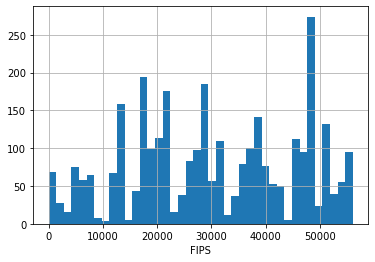

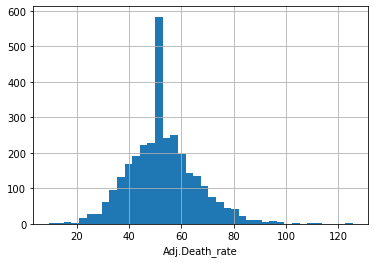

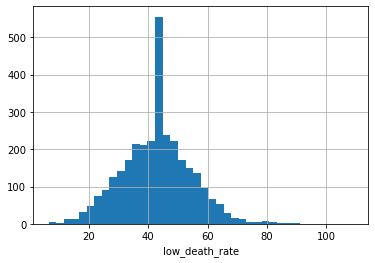

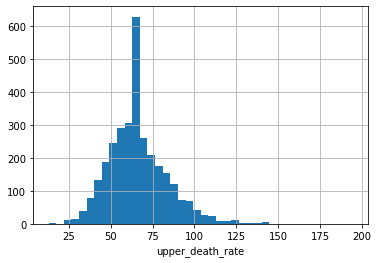

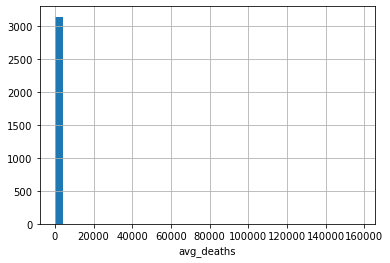

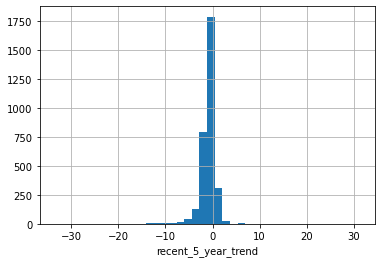

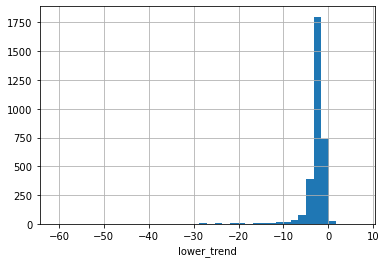

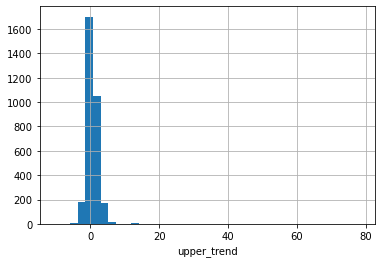

In [169]:
#tranforming continous data.
continous_data=[]
for cols in numerical_features:
    if len(data_frame[cols].unique())>25:
        continous_data.append(cols)
        data_frame[cols].hist(bins=40)
        plt.xlabel(cols)
        plt.show()

In [170]:
#'FIPS', 'Adj.Death_rate','low_death_rate','upper_death_rate','avg_deaths','lower_trend','upper_trend'
#these features are need to be tranformed.

In [171]:
features_trans=['FIPS', 'Adj.Death_rate','low_death_rate','upper_death_rate','avg_deaths','lower_trend','upper_trend']
transformed_features=[]
for cols in features_trans:
    if 0 in data_frame[cols].unique():
        pass
    else:
        transformed_features.append(cols)
        data_frame[cols]=np.log(data_frame[cols])

In [172]:
data_frame.head()

,FIPS,45.5_objective,Adj.Death_rate,low_death_rate,upper_death_rate,avg_deaths,recent_trend,recent_5_year_trend,lower_trend,upper_trend,State
0,0,No,3.828641,3.826465,3.830813,11.966393,falling,-2.4,-2.6,-2.2,United States
1,21193,No,4.833102,4.690430,4.971201,3.761200,stable,-0.6,-2.7,1.6,Kentucky
2,21197,No,4.830711,4.607168,5.044070,2.890372,stable,1.7,0.0,3.4,Kentucky
3,2185,No,4.827513,4.290459,5.271460,1.609438,Missing,-0.8,-2.1,0.6,Alaska
4,21189,No,4.774913,4.420045,5.108971,2.079442,stable,2.2,-0.4,4.8,Kentucky


In [173]:
print('Features transformed: ',transformed_features)

Features transformed:  ['Adj.Death_rate', 'low_death_rate', 'upper_death_rate', 'avg_deaths']


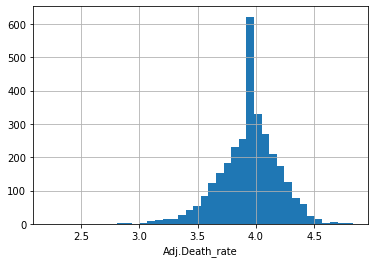

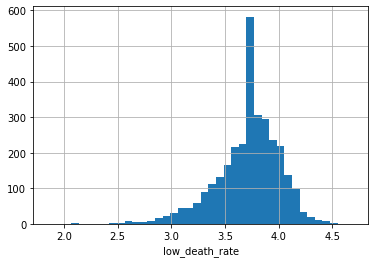

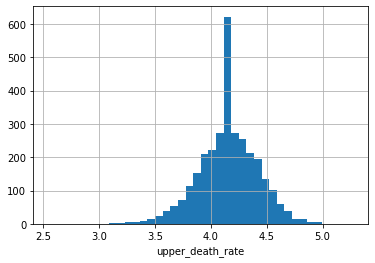

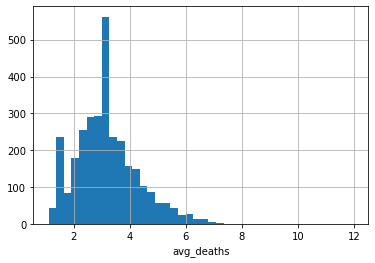

In [174]:
for cols in transformed_features:
    data_frame[cols].hist(bins=40)
    plt.xlabel(cols)
    plt.show()

In [175]:
#handling categorical variables.
#checking out rare categories.
for cols in categorical_features:
    if cols!='State':
        percentage=data_frame.groupby(cols)['FIPS'].count()/len(data_frame)
        percentage_index=percentage[percentage>0.1].index
        data_frame[cols]=np.where(data_frame[cols].isin(percentage_index),data_frame[cols],'Rare_var')

In [176]:
data_frame[categorical_features].head(20)

,45.5_objective,recent_trend,State
0,No,falling,United States
1,No,stable,Kentucky
2,No,stable,Kentucky
3,No,Missing,Alaska
4,No,stable,Kentucky
5,No,falling,Florida
6,No,Rare_var,Kentucky
7,No,stable,Kentucky
8,No,stable,Kentucky
9,No,stable,Kentucky


In [177]:
#'State' feature need not to contain Rare_var because all the categories comes under 'Rare_var'.

In [178]:
#now, converting categorical features into numeric features.
#checking the number of categories in features.
for cols in categorical_features:
    print(cols,': ',len(data_frame[cols].value_counts()))

45.5_objective :  3
recent_trend :  4
State :  52


In [179]:
for cols in categorical_features:
    rank=data_frame[cols].value_counts(ascending=True).index
    mapping={k:i for i,k in enumerate(rank,0)}
    data_frame[cols]=data_frame[cols].map(mapping)

In [180]:
data_frame.head()

,FIPS,45.5_objective,Adj.Death_rate,low_death_rate,upper_death_rate,avg_deaths,recent_trend,recent_5_year_trend,lower_trend,upper_trend,State
0,0,2,3.828641,3.826465,3.830813,11.966393,2,-2.4,-2.6,-2.2,0
1,21193,2,4.833102,4.690430,4.971201,3.761200,3,-0.6,-2.7,1.6,48
2,21197,2,4.830711,4.607168,5.044070,2.890372,3,1.7,0.0,3.4,48
3,2185,2,4.827513,4.290459,5.271460,1.609438,1,-0.8,-2.1,0.6,15
4,21189,2,4.774913,4.420045,5.108971,2.079442,3,2.2,-0.4,4.8,48


In [181]:
#normalizing the data.
#using mixmax scaler.
from sklearn.preprocessing import MinMaxScaler

In [182]:
scaler=MinMaxScaler()
x=data_frame.iloc[:,1:-1]
scaler.fit(x)

MinMaxScaler()

In [187]:
transformed_data=scaler.transform(x)
transformed_data_frame=pd.DataFrame(scaler.transform(x),columns=x.columns)
transformed_data_frame

,45.5_objective,Adj.Death_rate,low_death_rate,upper_death_rate,avg_deaths,recent_trend,recent_5_year_trend,lower_trend,upper_trend
0,1.0,0.615723,0.695157,0.470742,1.000000,0.666667,0.480620,0.859882,0.091629
1,1.0,1.000000,1.000000,0.889692,0.244998,1.000000,0.508527,0.858407,0.134615
2,1.0,0.999085,0.970622,0.916463,0.164869,1.000000,0.544186,0.898230,0.154977
3,1.0,0.997862,0.858874,1.000000,0.047004,0.333333,0.505426,0.867257,0.123303
4,1.0,0.977739,0.904597,0.940306,0.090251,1.000000,0.551938,0.892330,0.170814
...,...,...,...,...,...,...,...,...,...
3136,0.0,0.667016,0.671307,0.591267,0.179053,0.333333,0.505426,0.867257,0.123303
3137,0.0,0.667016,0.671307,0.591267,0.179053,0.333333,0.505426,0.867257,0.123303
3138,0.0,0.667016,0.671307,0.591267,0.179053,0.333333,0.505426,0.867257,0.123303
3139,0.0,0.667016,0.671307,0.591267,0.179053,0.333333,0.505426,0.867257,0.123303


In [190]:
final_data_frame=pd.concat([data_frame[['FIPS']].reset_index(drop=True),transformed_data_frame],axis=1)
final_data_frame.head()

,FIPS,45.5_objective,Adj.Death_rate,low_death_rate,upper_death_rate,avg_deaths,recent_trend,recent_5_year_trend,lower_trend,upper_trend
0,0,1.0,0.615723,0.695157,0.470742,1.000000,0.666667,0.480620,0.859882,0.091629
1,21193,1.0,1.000000,1.000000,0.889692,0.244998,1.000000,0.508527,0.858407,0.134615
2,21197,1.0,0.999085,0.970622,0.916463,0.164869,1.000000,0.544186,0.898230,0.154977
3,2185,1.0,0.997862,0.858874,1.000000,0.047004,0.333333,0.505426,0.867257,0.123303
4,21189,1.0,0.977739,0.904597,0.940306,0.090251,1.000000,0.551938,0.892330,0.170814


In [191]:
final_data_frame.to_csv('final_data.csv',index=False)